In [1]:
!pwd

/Users/edmond_20000/Desktop/Edmond-repo/projects/final-projects


In [2]:
import pandas as pd
from dateutil import relativedelta as rdelta
import datetime
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sic

In [3]:
df = pd.read_excel("patients_report_list_new.xlsx") #patients dataset path

In [4]:
df.head() #seeing how the data looks like

,Patient Number,Date of Service,Scheduled Return Date,DATE,Date of birth,First Name,Gender,State,Address,City,Diagnosis Detail
0,79-0096808,4/18/2016,2/8/2017,True,8/12/1974,Margaret Frazier,Female,New York,0 Westridge Hill,New York City,mild
1,01-1402733,2016-02-26 00:00:00,2016-08-30 00:00:00,False,7/31/1973,Johnny Bradley,Male,California,57498 Banding Court,Stockton,serious
2,41-0477300,3/8/2016,2/18/2017,True,8/13/1954,Gregory Rose,Male,Ohio,93 Red Cloud Alley,Columbus,mild
3,40-5336702,10/8/2016,2017-01-07 00:00:00,True,10/24/1971,Sharon Clark,Female,Alabama,3957 Fisk Alley,Birmingham,normal
4,99-3992926,2016-11-23 00:00:00,1/23/2017,False,8/7/1984,Earl Hayes,Male,Mississippi,8398 Service Place,Columbus,mild


In [5]:
import datetime #reading the dates

In [6]:
df["Scheduled Return Date"] = df["Scheduled Return Date"].astype(str)
df["Date of Service"] = df["Date of Service"].astype(str)
df["Date of birth"] = df["Date of birth"].astype(str)

In [7]:
df["Scheduled Return Date"].unique() #what are all the scheduled returned date of all the patients

array(['2/8/2017', '2016-08-30 00:00:00', '2/18/2017',
       '2017-01-07 00:00:00', '1/23/2017', '2017-01-06 00:00:00',
       '10/16/2016', '3/14/2017', '4/5/2017', '1/18/2017',
       '2017-03-09 00:00:00', '2016-07-17 00:00:00', '2017-03-11 00:00:00',
       '3/3/2017', '3/28/2017', '6/22/2017', '7/21/2017', '11/18/2016',
       '1/6/2017', '5/6/2017', '2/4/2017', '2016-10-18 00:00:00',
       '2/11/2017', '11/25/2016', '7/31/2017', '2017-01-28 00:00:00',
       '2016-12-30 00:00:00', '4/25/2017', '2016-12-29 00:00:00',
       '2016-12-01 00:00:00', '6/20/2017', '11/20/2016', '12/24/2016',
       '5/9/2017', '12/27/2016', '12/22/2016', '10/7/2016', '1/21/2017',
       '2017-03-19 00:00:00', '2/26/2017', '5/7/2017', '11/15/2016',
       '2017-01-20 00:00:00', '6/16/2017', '4/19/2017',
       '2016-12-05 00:00:00', '3/27/2017', '2016-12-24 00:00:00',
       '3/7/2017', '4/16/2017', '7/2/2017', '10/12/2016', '11/16/2016',
       '6/8/2017', '2016-12-12 00:00:00', '2/20/2017', '2/22/20

In [8]:
today = datetime.date.today() #Checking today's date
print today

2017-02-08


In [9]:
print 'ctime:', today.ctime()

ctime: Wed Feb  8 00:00:00 2017


In [10]:
date1 = datetime.datetime.strptime("4/18/2016","%M/%d/%Y") #Service date

In [11]:
date2 = datetime.datetime.strptime('2017-02-08 00:00:00',"%Y-%m-%d %H:%M:%S") #current date

In [12]:
(date2 - date1).days #difference between the first date of the service to currrent date

386

In [13]:
#using the CleanDate function to convert all the dates to one date format. 0000-00-00
def cleanDate(someDate):
    if someDate == None:
        return someDate

    if "/" in someDate:
        finalDate = datetime.datetime.strptime(someDate,"%M/%d/%Y") 
    else:
        finalDate = datetime.datetime.strptime(someDate,"%Y-%m-%d %H:%M:%S")
    return finalDate

In [14]:
df['Date of birth'] = df["Date of birth"].apply(cleanDate) #convert date of birth format to yyyy-mm-dd

In [15]:
df["Scheduled Return Date"] = df["Scheduled Return Date"].apply(cleanDate) #convert scheduled return date to yyyy-mm-dd

In [16]:
df["Date of Service"] = df["Date of Service"].apply(cleanDate) #conveting date of service format to yyyy-mm-dd

In [17]:
todayDate = datetime.datetime.now() 

In [18]:
df.head() #how the dataframe looking now after fixing the date format

,Patient Number,Date of Service,Scheduled Return Date,DATE,Date of birth,First Name,Gender,State,Address,City,Diagnosis Detail
0,79-0096808,2016-01-18 00:04:00,2017-01-08 00:02:00,True,1974-01-12 00:08:00,Margaret Frazier,Female,New York,0 Westridge Hill,New York City,mild
1,01-1402733,2016-02-26 00:00:00,2016-08-30 00:00:00,False,1973-01-31 00:07:00,Johnny Bradley,Male,California,57498 Banding Court,Stockton,serious
2,41-0477300,2016-01-08 00:03:00,2017-01-18 00:02:00,True,1954-01-13 00:08:00,Gregory Rose,Male,Ohio,93 Red Cloud Alley,Columbus,mild
3,40-5336702,2016-01-08 00:10:00,2017-01-07 00:00:00,True,1971-01-24 00:10:00,Sharon Clark,Female,Alabama,3957 Fisk Alley,Birmingham,normal
4,99-3992926,2016-11-23 00:00:00,2017-01-23 00:01:00,False,1984-01-07 00:08:00,Earl Hayes,Male,Mississippi,8398 Service Place,Columbus,mild


In [19]:
#need to get the difference in date
def getDateDelta(x):
    dateOfService = x[0]
    scheduledDate = x[1]
    return (scheduledDate - dateOfService).days

In [20]:
df["dateToReturn"] = df[["Date of Service","Scheduled Return Date"]].apply(getDateDelta, axis = 1) 
#dateToReturn will be the date difference from the first date of service up to the return service date

In [21]:
import datetime
import dateutil

def birthday(date):
    # Get the current date
    now = datetime.datetime.now()

    # Get the difference between the current date and the birthday
    age = dateutil.relativedelta.relativedelta(now, date)
    age = age.years

    return age

df['Age'] = df['Date of birth'].apply(birthday) 

In [22]:
def binAge(age): #binning the date so 4 will be the oldest
    if age <= 20:
        aG = 1
    elif age <= 40:
        aG = 2
    elif age <= 60:
        aG= 3
    else:
        aG = 4
    return aG

In [23]:
df["ageGroup"] = df.Age.apply(binAge) #using ageGroup instead of Age

In [24]:
df['Age'].max() #getting the Max age

65

In [25]:
diagnosisDictionary = {"normal" : 1, "mild" : 2, "serious" : 3, 'grave' : 4  } #assigning numbers to diagnosis

diagnosisDictionary["normal"]
diagnosisDictionary["mild"]

2

In [26]:
diagnosisDictionary = {"normal" : 1, "mild" : 2, "serious" : 3, 'grave' : 4  }

#New dataframe with only the columns needed
def diagnosisToInt(code):
    code = code.strip()
    return diagnosisDictionary[code]
    
ColumnsToKeep = ["dateToReturn", "ageGroup", "Gender", "Diagnosis Detail", "City", "Age"]
df["Gender"] = df["Gender"].str.contains("Male").astype(int)
df["Diagnosis Detail"] = df["Diagnosis Detail"].apply(lambda code: diagnosisToInt(code))
                 
df2 = df[ColumnsToKeep]
df2.head()

,dateToReturn,ageGroup,Gender,Diagnosis Detail,City,Age
0,355,3,0,2,New York City,43
1,186,3,1,3,Stockton,44
2,375,4,1,2,Columbus,63
3,364,3,0,1,Birmingham,46
4,61,2,1,2,Columbus,33


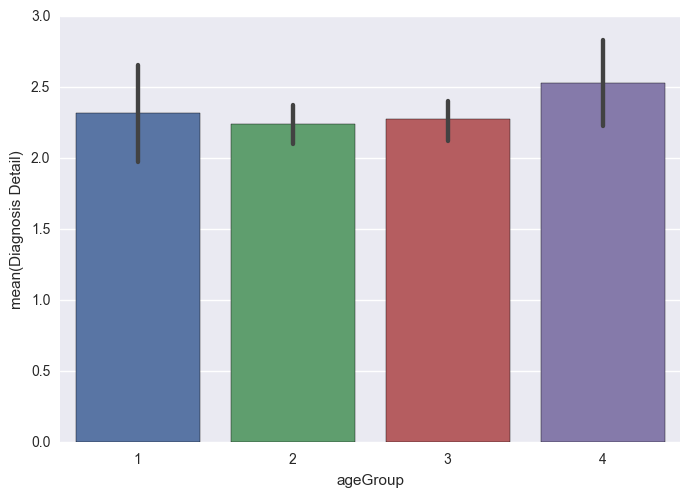

In [27]:
sic.barplot(x= df2.ageGroup, y= df2["Diagnosis Detail"])

In [28]:
df.groupby("Diagnosis Detail").describe()

Age      Gender    ageGroup  dateToReturn
Diagnosis Detail                                                        
1                count  150.000000  150.000000  150.000000    150.000000
                 mean    40.253333    0.400000    2.500000    297.153333
                 std     13.727544    0.491539    0.739581    168.150410
                 min     17.000000    0.000000    1.000000    -88.000000
                 25%     28.250000    0.000000    2.000000    326.750000
                 50%     40.000000    0.000000    2.000000    362.000000
                 75%     51.000000    1.000000    3.000000    375.750000
                 max     65.000000    1.000000    4.000000    656.000000
2                count  129.000000  129.000000  129.000000    129.000000
                 mean    41.534884    0.542636    2.565891    261.976744
                 std     14.215994    0.500121    0.808596    178.010115
                 min     17.000000    0.000000    1.000000    -29.000000
                 25%     30.000000    0.000000    2.000000     22.000000
                 50%     43.000000    1.000000    3.000000    358.000000
                 75%     52.000000    1.000000    3.000000    370.000000
                 max     65.000000    1.000000    4.000000    684.000000
3                count  147.000000  147.000000  147.000000    147.000000
                 mean    40.374150    0.496599    2.510204    290.285714
                 std     13.845632    0.501698    0.761823    175.242493
                 min     17.000000    0.000000    1.000000   -369.000000
                 25%     28.000000    0.000000    2.000000    306.500000
                 50%     39.000000    0.000000    2.000000    357.000000
                 75%     52.500000    1.000000    3.000000    372.000000
                 max     65.000000    1.000000    4.000000    715.000000
4                count   74.000000   74.000000   74.000000     74.000000
                 mean    42.824324    0.540541    2.675676    268.148649
                 std     15.607654    0.501756    0.861793    167.257547
                 min     17.000000    0.000000    1.000000   -185.000000
                 25%     29.000000    0.000000    2.000000    307.250000
                 50%     45.000000    1.000000    3.000000    353.000000
                 75%     58.000000    1.000000    3.000000    364.000000
                 max     64.000000    1.000000    4.000000    434.000000

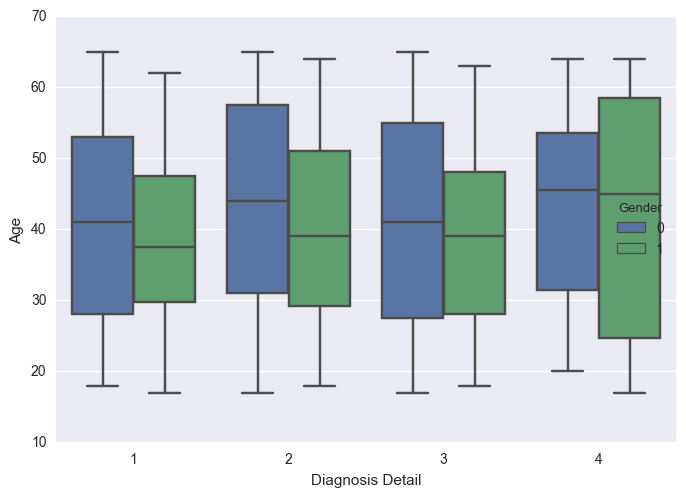

In [29]:
sic.boxplot(x= df2["Diagnosis Detail"], y= df2.Age, hue=df2.Gender)

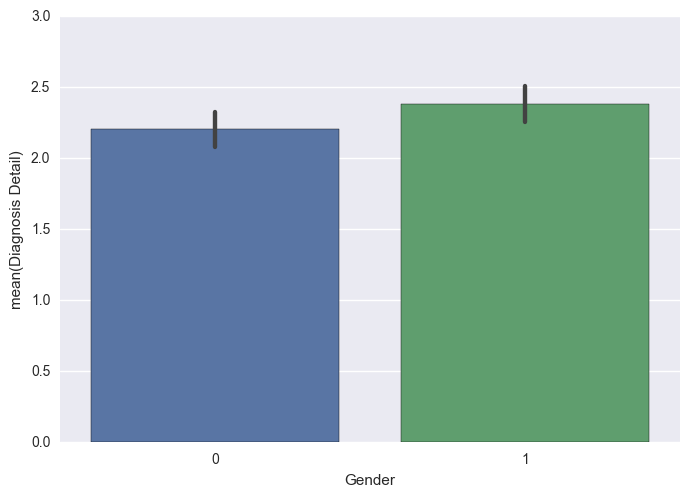

In [30]:
sic.barplot(x= df2.Gender, y= df2["Diagnosis Detail"])

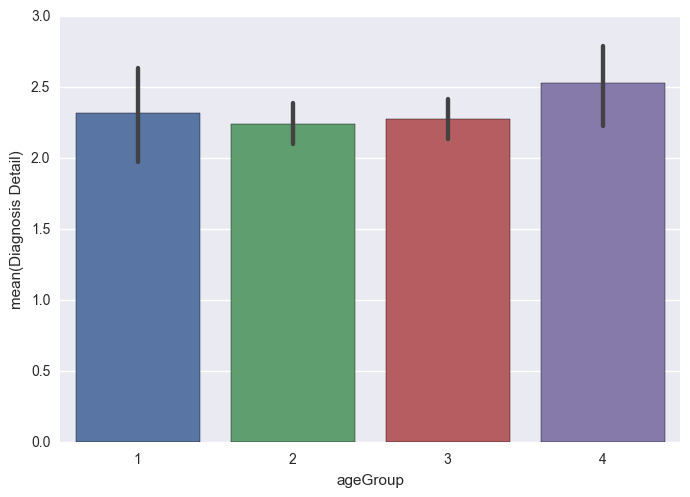

In [31]:
sic.barplot(x= df2.ageGroup, y= df2["Diagnosis Detail"])

In [32]:
df2.head(5)

,dateToReturn,ageGroup,Gender,Diagnosis Detail,City,Age
0,355,3,0,2,New York City,43
1,186,3,1,3,Stockton,44
2,375,4,1,2,Columbus,63
3,364,3,0,1,Birmingham,46
4,61,2,1,2,Columbus,33


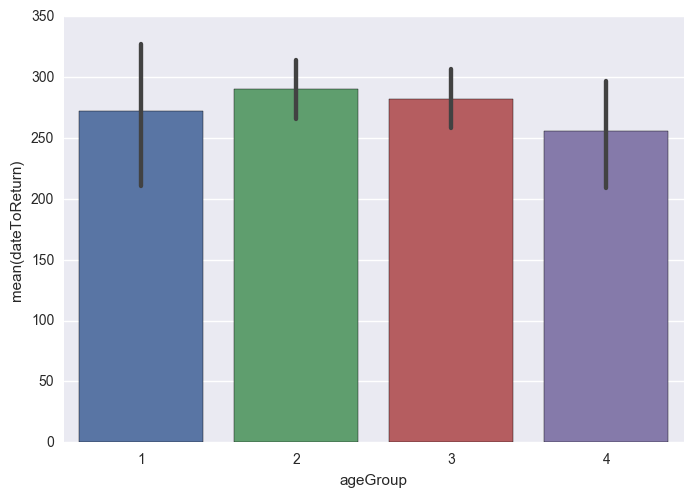

In [33]:
sic.barplot(x= df2.ageGroup, y= df2.dateToReturn)

In [34]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()



In [35]:
dummies = pd.get_dummies(df2['Diagnosis Detail'])
dfModel = df2.join(dummies)
dfModel.head()

,dateToReturn,ageGroup,Gender,Diagnosis Detail,City,Age,1,2,3,4
0,355,3,0,2,New York City,43,0,1,0,0
1,186,3,1,3,Stockton,44,0,0,1,0
2,375,4,1,2,Columbus,63,0,1,0,0
3,364,3,0,1,Birmingham,46,1,0,0,0
4,61,2,1,2,Columbus,33,0,1,0,0


In [36]:
x = dfModel[dfModel.columns[0:3]]
y1 = dfModel[dfModel.columns[4]]
y2 = dfModel[dfModel.columns[5]]
y3 = dfModel[dfModel.columns[6]]
y4 = dfModel[dfModel.columns[7]]

In [37]:
y1.head(4)

0    New York City
1         Stockton
2         Columbus
3       Birmingham
Name: City, dtype: object

In [38]:
Modely1 = model.fit(x,y1) #fitting the models

In [39]:
Modely2 = model.fit(x, y2)

In [40]:
Modely3 = model.fit(x, y3)

In [41]:
Modely4 = model.fit(x, y4)

In [42]:
Modely1.feature_importances_


array([ 0.92235811,  0.06073417,  0.01690772])

In [43]:
Modely2.feature_importances_

array([ 0.92235811,  0.06073417,  0.01690772])

In [44]:
Modely3.feature_importances_

array([ 0.92235811,  0.06073417,  0.01690772])

In [45]:
Modely4.feature_importances_

array([ 0.92235811,  0.06073417,  0.01690772])

In [46]:
#Pretty much the numbers above are pretty much the same. 
#This looks to be impossible to predict the patients that are more likely to return to the clinic with the data available.